# Project Abtract:
In today's competitive academic landscape, accurately predicting university admissions has become crucial for both students and educational institutions. This project presents a data-driven approach to predict university admissions using a comprehensive dataset encompassing various attributes of applicants. By leveraging the power of data science and statistical analysis, this study aims to provide valuable insights into the factors influencing admission decisions.

The project utilizes linear regression, a widely adopted technique in data science, to model the relationship between a range of applicant characteristics and the likelihood of securing admission. Through extensive data exploration, feature engineering, and rigorous model training, the project strives to capture the complexity and nuances inherent in university admissions processes.

While the specific algorithms and techniques employed in this project are not discussed in this abstract, the focus remains on the predictive power of the model and the potential benefits it offers. By accurately predicting admissions, prospective students can make informed decisions about their choice of universities and plan their academic journey accordingly. Likewise, educational institutions can gain valuable insights into their admissions processes, identifying areas for improvement and ensuring a fair and transparent selection process.

The project's findings shed light on the relative importance of various applicant attributes in the admissions decision-making process. This understanding can aid universities in devising targeted strategies to attract and evaluate candidates effectively. Furthermore, it highlights the potential for data science to revolutionize the higher education landscape by providing evidence-based decision support tools.



# Columns Details

Serial No.: This column represents a unique serial number or identifier for each record in the dataset.
    
GRE Score: This column denotes the Graduate Record Examination (GRE) score of the applicant, which is a standardized test used for admissions to graduate programs.
    
TOEFL Score: This column represents the Test of English as a Foreign Language (TOEFL) score of the applicant, which measures English language proficiency.
    
University Rating: This column indicates the rating or reputation of the university where the applicant is seeking admission.
    
SOP: This column represents the Statement of Purpose (SOP) score, which reflects the quality of the applicant's essay or statement explaining their academic and career goals.
    
LOR: This column denotes the Letter of Recommendation (LOR) score, which reflects the strength and quality of the recommendation letters provided by referees.
    
CGPA: This column represents the Cumulative Grade Point Average (CGPA) of the applicant, which is a measure of their academic performance.
    
Research: This column is a binary indicator (e.g., 0 or 1) that represents whether the applicant has research experience.
    
Chance of Admit: This column indicates the likelihood or probability of the applicant being admitted to the university or program they have applied to.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataframe=pd.read_csv("adm_data.csv")

In [3]:
dataframe

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
dataframe['CGPA'].unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Data Cleaning
Checking for missing values

<Axes: >

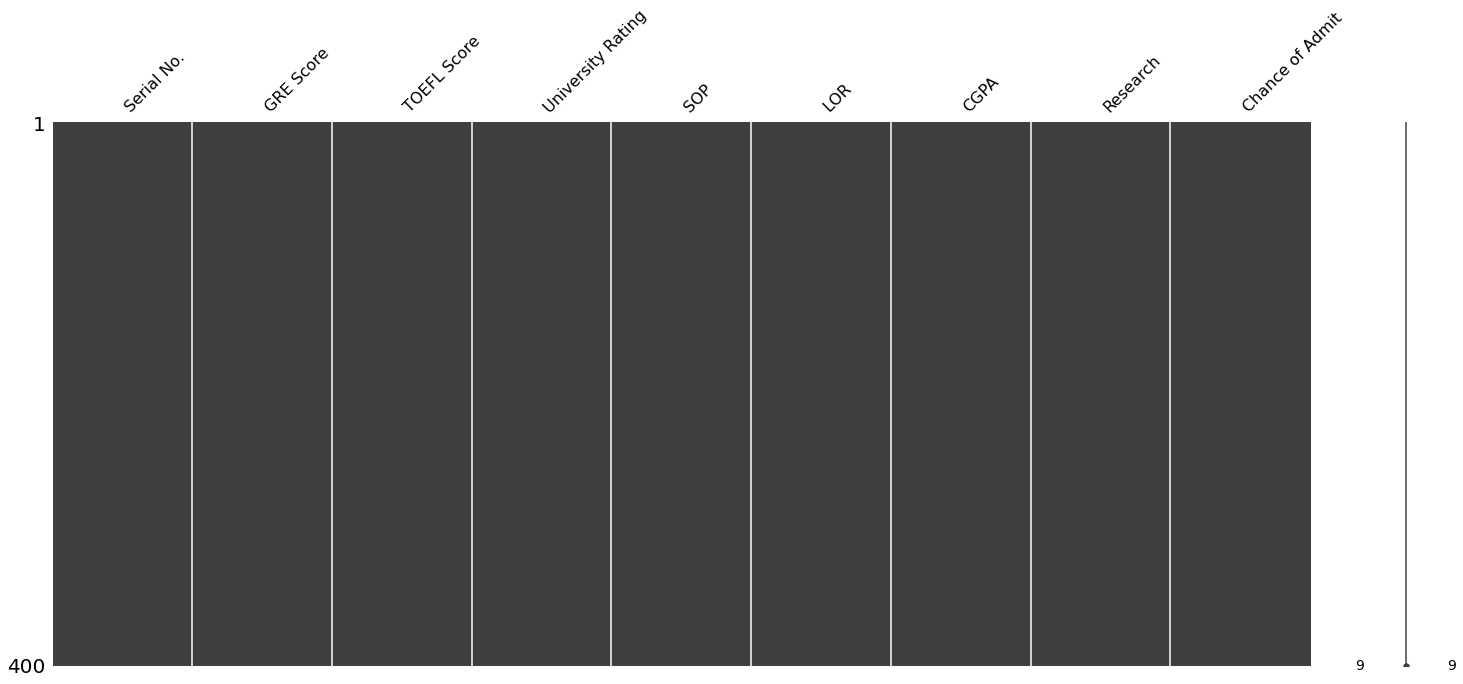

In [6]:
import missingno as msno 
msno.matrix(dataframe)

In [7]:
campaign=dataframe.groupby("University Rating").sum()["CGPA"]

In [8]:
campaign

University Rating
1     201.39
2     875.66
3    1137.45
4     667.60
5     557.47
Name: CGPA, dtype: float64

# Rating of University according to CGPA

<Axes: xlabel='University Rating'>

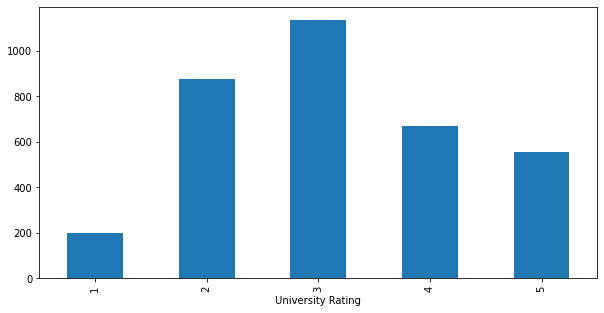

In [9]:
campaign.plot.bar(x='University Rating', y='CGPA', figsize=(10,5))

# Checking The Correlation Using Heatmap******

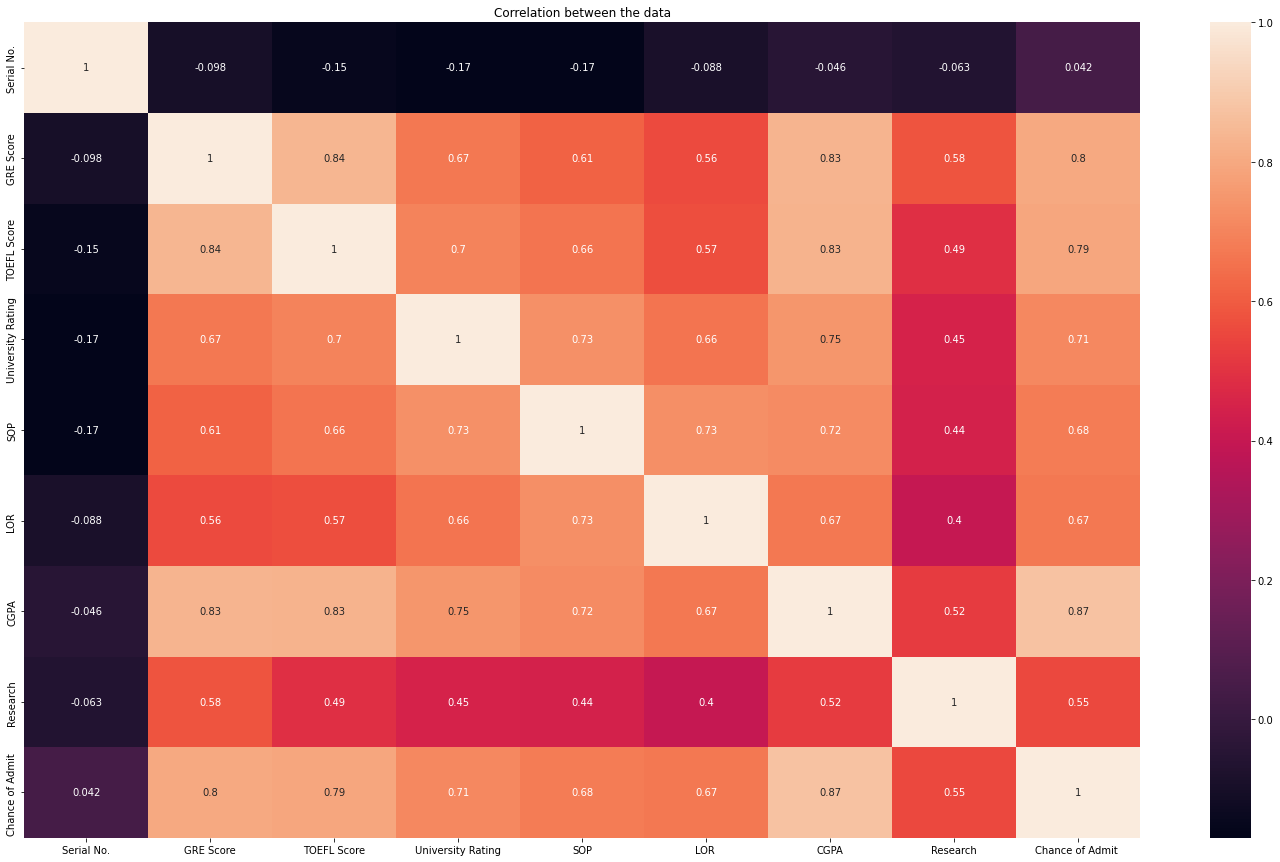

In [10]:
plt.figure(figsize=(25,15))
Data_for_Admission = dataframe.corr()

# Ploty 
sns.heatmap(Data_for_Admission, annot=True, cmap='rocket').set(
    title = "Correlation between the data"
)

# Show
plt.xticks(rotation=360)
plt.show()


# Checking The Histogram ploting

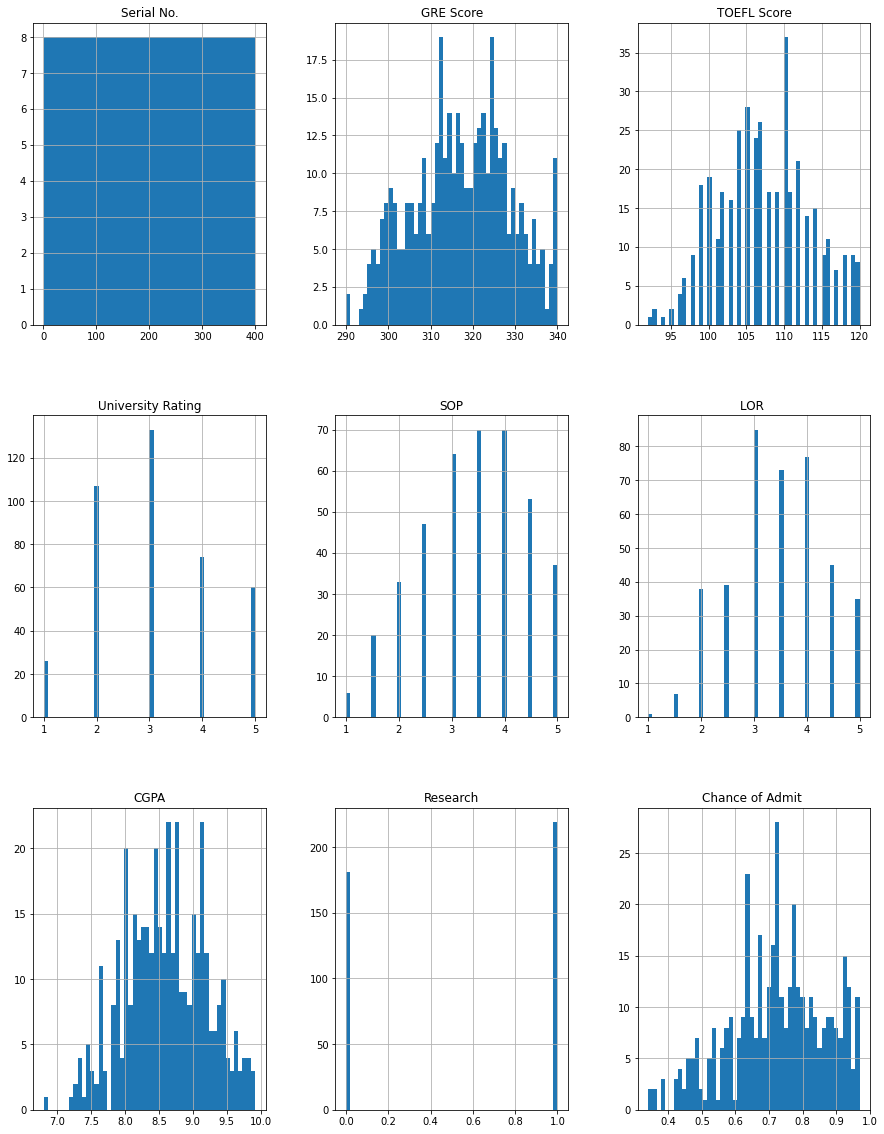

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
dataframe.hist(bins=50,figsize=(15,20))
plt.show()


In [12]:
x = dataframe[['TOEFL Score','CGPA','University Rating','GRE Score','Research']]
y = dataframe['Chance of Admit ']


# Training and Testing Data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


# Training the Model

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train,y_train)
LinearRegression()


LinearRegression()

# Predicting Test Data

In [15]:
y_pred = lm.predict(X_test)
lm.score(x,y)

0.7943138656119738

# Evaluating the Model

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Erro

In [16]:
from sklearn import metrics

In [17]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   0.0394601844523197
MSE :   0.0036974689423926155
RMAE :   0.06080681657834601


# Residuals

<ipython-input-18-c8d8e604d852>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred,bins=50)


<Axes: xlabel='Chance of Admit ', ylabel='Density'>

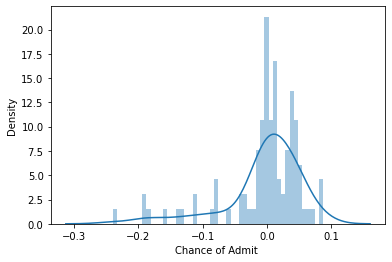

In [18]:
sns.distplot(y_test - y_pred,bins=50)